## Hand written Digit Recognition using `Tensorflow` and `Keras`
### Importing Libraries


In [89]:
import tensorflow as tf
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

## Dataset
Here we use MNIST dataset which consists of 70000 samples of hand written digits which we will use to train and evaluate our model. Each sample in the dataset contains a 28x28 pixel image and the correseponding integer associated with image.

In [158]:
data = tf.keras.datasets.mnist

### Load the data
We will split the dataset into test data and train data where train data will contain 60000 samples and test will contain the remaining 10000 samples. We split the test and train datas into two parts, one contains the matrix of pixels of each image and the other has the corresponding integer of the image.

In [162]:
train ,test = data.load_data()
(x_train,y_train) = train
(x_test,y_test) = test
print("Number of train samples = {}".format(x_train.shape[0]))
print("Number of test samples = {}".format(x_test.shape[0]))


Number of train samples = 60000
Number of test samples = 10000


### Prepare the data
We then normalize the data using built in normalize function provided by keras. This helps to improve the models performance and stability while training.

In [163]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

## Neural Network Model
### Define the model
Here we are using Sequential model with the following layers:<br><ul>
    <li>``Layer`` (input layer)</li>
    <li>``Dense`` Layer with 128 neurons and relu activation</li>
    <li>``Dense`` Layer with 128 neurons and relu activation</li>
    <li>``Dense`` Layer with 10 neurons and softmax activation (output layer)</li></ul>
The output layer has 10 outputs and each output corresponds to the probability of the image being the number that corresponds to the index.

In [165]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Compile the model
We use built in compile function of keras to compile our model.<br>
`adam` optimizer is used.<br>
`sparse_categorical_crossentropy` is used as loss function to calcualte the losses.<br>
`accuracy` is used as metrics.

In [ ]:
model.compile(optimizer='adam',loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

### Train the model
We use built in ``.fit`` function to train our model with the test data. We pass the entire data set three times to train our model. This is done by setting the epochs parameter value to 3.

In [ ]:
model.fit(x_train,y_train,epochs=3)

### Save the model

In [166]:
model.save("hwdr.model")
print("Model saved successfully")

INFO:tensorflow:Assets written to: hwdr.model\assets


INFO:tensorflow:Assets written to: hwdr.model\assets


Model saved successfully


### Load the model
We try to load the existing model.

In [90]:
try:
    model = tf.keras.models.load_model('hwdr.model')
    print("Model loaded successfully...")
except:
    print("Error in loading model, try again..")

Model loaded successfuly...


### Evaluate the model
We then evaluate the model's performance by testing its performance against the test data. We measure the performance by checking the total loss and accuracy the model produces while running it with the test data.

In [91]:
res = model.evaluate(x_test,y_test,verbose=0)
print("Loss = {}".format(res[0]))
print("Accuracy = {}%".format(math.ceil(res[1]*100)))

Loss = 0.09022942185401917
Accuracy = 98%


### Prediction using model
Provide the path of the image, that you want to predict using the trained model. The image provided can be of any dimensions as it is resized to the required dimension using `cv2.resize`. The given image is resized and is provided to the model for prediction and the number is predicted based on the higest probability of all the 10 outputs.

Predicted number by the model is 1


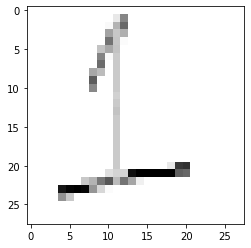

In [173]:
#Mention the path in image_path

image_path = 'digits/1.png' 


img = cv2.imread(f"{image_path}")[:,:,1]
img = cv2.resize(img,(28,28), interpolation=cv2.INTER_AREA)
img = np.invert(np.array([img]))
img = tf.keras.utils.normalize(img,axis=1)
plt.imshow(img[0], cmap=plt.cm.binary)
pred = model.predict(img,verbose=0)[0]
print("Predicted number by the model is {}".format(np.argmax(pred)))
